In [3]:
#Practical 1:  To use PCA Algorithm for dimensionality reduction. You have a dataset that includes measurements for different variables on 
#wine(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data so that most variations in the measurements of the variables are 
#captured by a small number of principal components so that it is easier to distinguish between red and white wine by inspecting these principal components. 

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# Load
df = pd.read_csv("C:/Users/karin/Downloads/Wine.csv") 
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [9]:
# Step 4: Separate features and target
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

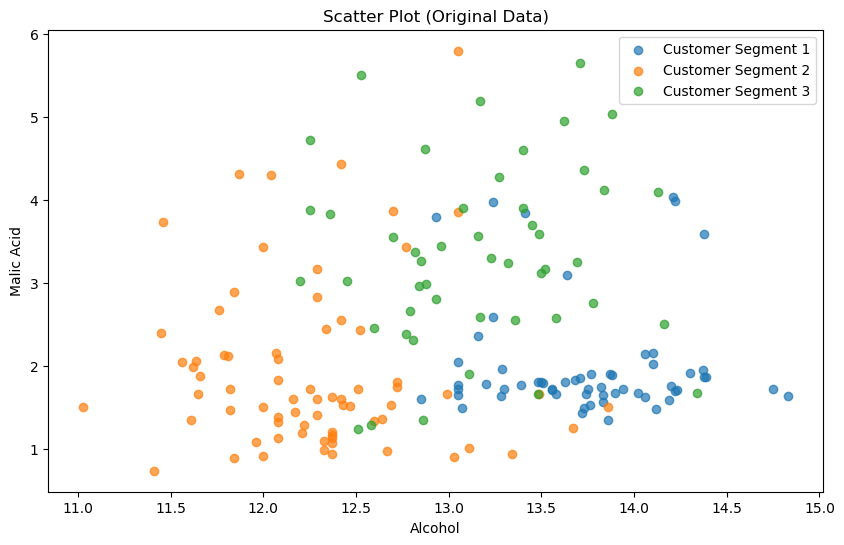

In [10]:
# Scatter plot before applying PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1]['Alcohol'], X[y == 1]['Malic_Acid'], label='Customer Segment 1', alpha=0.7)
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label='Customer Segment 2', alpha=0.7)
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [13]:
# Create a new DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Customer_Segment'] = y

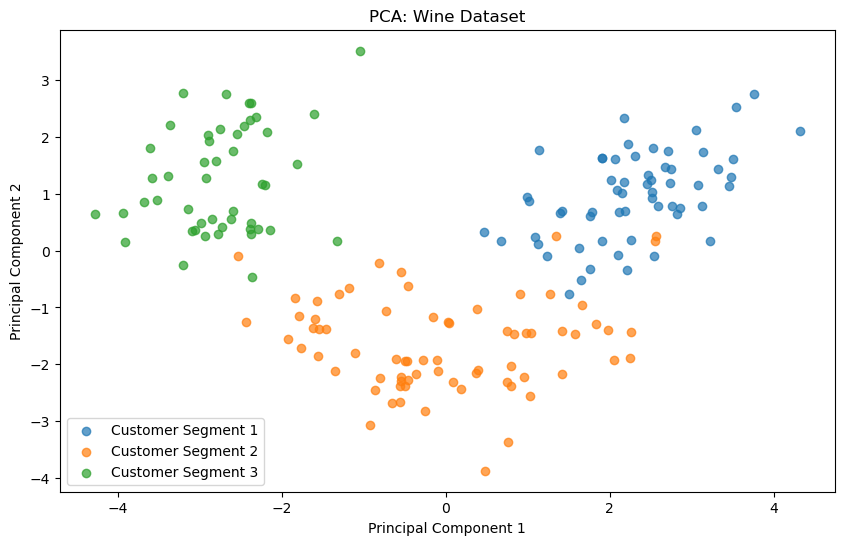

In [14]:
# Visualize the data using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 2'], label='Customer Segment 1', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 2'], label='Customer Segment 2', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 2'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Wine Dataset')
plt.show()

In [15]:
# Explained Variance Ratio: This tells us how much information (or variance) each principal component keeps from the original data.
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Variance Captured: 0.5540633835693527


In [16]:
#Practical 2 : A) Predict the price of the Uber ride from a given pickup point to the agreed dropff location. Perform following tasks:  
# 1. Pre-process the dataset.  
# 2. Identify outliers.  
# 3. Check the correlation.  
# 4. Implement linear regression and ridge, Lasso regression models.  
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [18]:
# Load the dataset
data = pd.read_csv("C:/Users/karin/Downloads/archive (1)/uber.csv")

In [19]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [22]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [23]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [24]:
data = df.dropna()

In [25]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [26]:
# Remove invalid fare amounts (negative or zero)
data = data[data['fare_amount'] > 0]

# Keep reasonable passenger counts (1 to 6)
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] <= 6)]

KeyError: 'fare_amount'

In [59]:
data.duplicated().sum()

0

In [61]:
# Identify Outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=data['fare_amount'])
plt.title("Boxplot - Fare Amount Outliers")
plt.show()

KeyError: 'fare_amount'

<Figure size 800x500 with 0 Axes>

In [63]:
# Step 3: Correlation Check
# -----------------------------
corr_matrix = data[numeric_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

NameError: name 'numeric_cols' is not defined

In [65]:
# Step 4: Select Features and Target
# -----------------------------
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']


KeyError: "None of [Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',\n       'dropoff_latitude', 'passenger_count'],\n      dtype='object')] are in the [columns]"

In [67]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [69]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Step 7: Linear Regression
# ------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [73]:
y_pred_lr = lr.predict(X_test)


In [75]:
# Step 8: Ridge Regression
# ------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [77]:
y_pred_ridge = ridge.predict(X_test)

In [79]:
# Step 9: Lasso Regression
# ------------------------------
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [81]:
y_pred_lasso = lasso.predict(X_test)

In [83]:
# Step 10: Evaluate Models
def evaluate_model_simple(actual, predicted, name):
    r2 = r2_score(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"\n{name} Results:")
    print("R² Score:", round(r2, 3))
    print("RMSE:", round(rmse, 3))

evaluate_model_simple(y_test, y_pred_lr, "Linear Regression")
evaluate_model_simple(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model_simple(y_test, y_pred_lasso, "Lasso Regression")



Linear Regression Results:
R² Score: 0.883
RMSE: 0.262

Ridge Regression Results:
R² Score: 0.883
RMSE: 0.261

Lasso Regression Results:
R² Score: 0.883
RMSE: 0.262


In [88]:
#Practical 3 : Classification Analysis  
# Implementation of Support Vector Machines (SVM) for classifying images of hand-written digits into their respective numerical classes (0 to 9). 

In [90]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [94]:
# Step 2: Load the Dataset (Digits 0-9)
digits = load_digits()
X = digits.data           # Features (64 pixels per image)
y = digits.target 

In [96]:
# Show the keys inside the dataset
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [100]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1797, 64)
y shape: (1797,)


In [98]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Number of samples: 1797
Number of features: 64


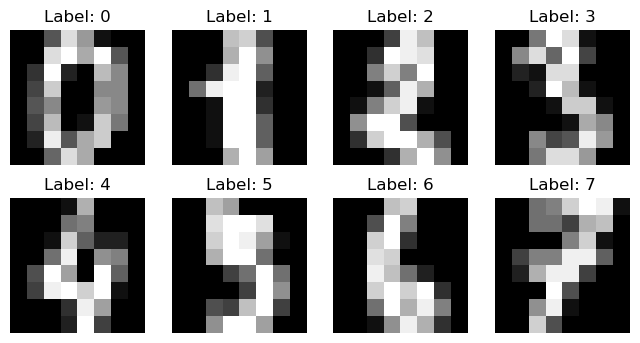

In [102]:
# Step 3: Visualize some digits
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.show()

In [104]:
# Step 4: Data Preprocessing - Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [106]:
# Step 5: Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [108]:
# Step 6: Train SVM Classifier
svm_model = SVC(kernel='linear')   # Using linear kernel for simplicity
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [110]:
# Step 7: Make Predictions
y_pred = svm_model.predict(X_test)


In [112]:
# Step 8: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Classifier Accuracy: {accuracy:.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Classifier Accuracy: 0.975

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

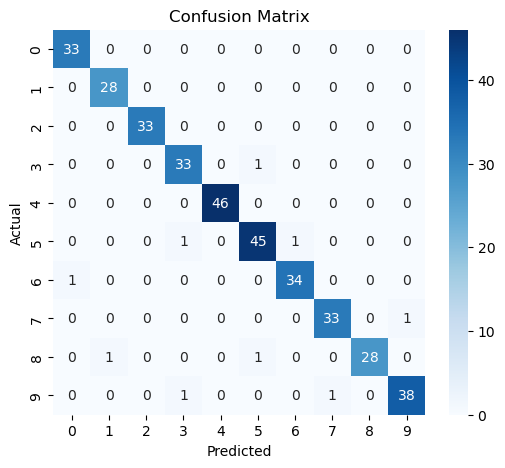

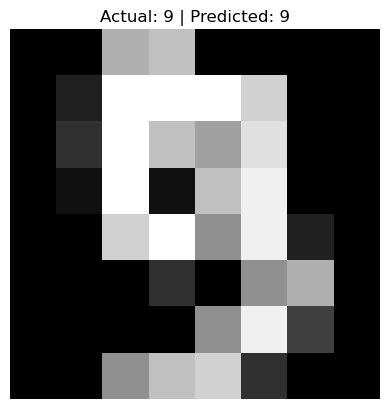

In [116]:
# Step 10: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Test on a Single Image
index = 9
plt.imshow(digits.images[index], cmap='gray')
plt.title(f"Actual: {digits.target[index]} | Predicted: {svm_model.predict([X[index]])[0]}")
plt.axis('off')
plt.show()

In [118]:
#Practical 4 :  Clustering Analysis 
#A) Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method. 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [121]:
data2 = pd.read_csv("C:/Users/karin/OneDrive/Desktop/Dataset/iris.csv")

In [124]:
data2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [126]:
data2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [128]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [130]:
data2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [132]:
data2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [134]:
data2.duplicated().sum()

1

In [136]:
data2 = data2.drop_duplicates()

In [138]:
data2.duplicated().sum()

0

In [140]:
# Select features (attributes) for clustering (e.g., sepal_length, sepal_width, petal_length, petal_width)
a = data2.iloc[:, 1:-1]  # Exclude the first column (id) and the last column (species)

In [142]:
# Standardize the feature matrix (important for K-Means)
scaler = StandardScaler()
a_scaled = scaler.fit_transform(a)

In [144]:
# Step 4: Determine Optimal Number of Clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(a_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

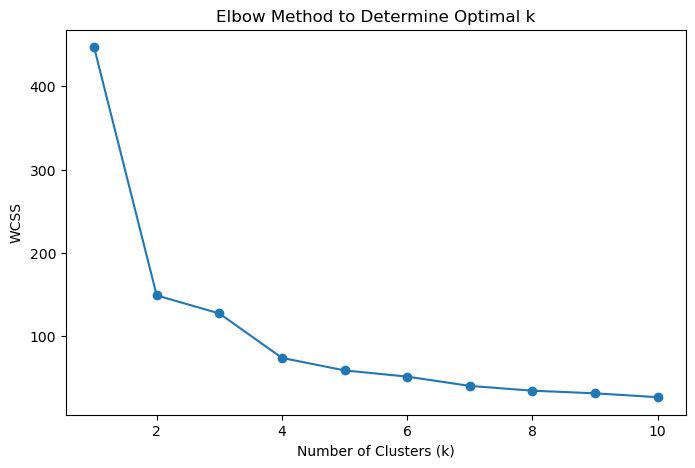

In [145]:
# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [153]:
#Practical 5 : Aim: Ensemble Learning  
# A) Implement Random Forest Classifier model to predict the safety of the car.

In [155]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [157]:
data3 = pd.read_csv("C:/Users/karin/Downloads/archive (2)/car_evaluation.csv")

In [159]:
data3 
#buying: vhigh, high, med, low.
#maint: vhigh, high, med, low.
#doors: 2, 3, 4, 5more.
#persons: 2, 4, more.
#lug_boot: small, med, big.
#safety: low, med, high.

#vhigh : buying price

 #   Current column	      Actual feature	  Possible values
#     vhigh	                 buying	        vhigh, high, med, low
#    vhigh.1                 maint	         vhigh, high, med, low
#       2	                 doors         	2, 3, 4, 5more
#      2.1                   persons          	2, 4, more
#     small               	lug_boot	      small, med, big
#      low	                 safety         	low, med, high
#     unacc	            class (decision)	unacc, acc, good, vgood
  

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [161]:
data3.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [163]:
data3.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [165]:
data3.duplicated().sum()

0

In [167]:
# Encoding all the string data
data3 = data3.apply(LabelEncoder().fit_transform)

In [169]:

# Define the features (X) and the target variable (y)
X = data3.iloc[:, :-1]  # Features (all columns except the last one)
y = data3.iloc[:, -1]   # Target variable (last column)

In [171]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [175]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [177]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [179]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [181]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9624277456647399

Confusion Matrix:
 [[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [184]:
# EXPERIMENT 6


In [188]:
# EXPERIMENT 6 
# EXPERIMENT 6: Q-Learning for Maze Pathfinding

import numpy as np
import random
import matplotlib.pyplot as plt



In [213]:
# Step 1: Define the Maze Environment
# 0 = empty cell, -1 = obstacle, 1 = goal
maze = np.array([
    [0, 0, 0, -1, 0],
    [0, -1, 0, -1, 0],
    [0, -1, 0, 0, 0],
    [0, 0, -1, -1, 0],
    [0, 0, 0, 0, 1]
])

n_rows, n_cols = maze.shape
n_actions = 4  # Up, Down, Left, Right
actions = ['up', 'down', 'left', 'right']



In [215]:
# Step 2: Initialize Q-Table
Q = np.zeros((n_rows, n_cols, n_actions))

In [217]:
# Step 3: Hyperparameters
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.2    # Exploration rate
episodes = 1000

In [219]:
# Step 4: Helper Function
def next_position(row, col, action):
    new_row, new_col = row, col
    if action == 0:      # Up
        new_row -= 1
    elif action == 1:    # Down
        new_row += 1
    elif action == 2:    # Left
        new_col -= 1
    elif action == 3:    # Right
        new_col += 1

    # Stay in place if out of bounds or hits obstacle
    if (0 <= new_row < n_rows) and (0 <= new_col < n_cols) and (maze[new_row, new_col] != -1):
        return new_row, new_col
    else:
        return row, col


In [221]:
# Step 5: Q-Learning Algorithm
for episode in range(episodes):
    row, col = 0, 0  # Start position
    while maze[row, col] != 1:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, n_actions - 1)  # Explore
        else:
            action = np.argmax(Q[row, col])            # Exploit

        new_row, new_col = next_position(row, col, action)

        # Reward
        if maze[new_row, new_col] == 1:
            reward = 100   # Goal reached
        else:
            reward = -1    # Step cost

        # Q-Learning Update Rule
        Q[row, col, action] = Q[row, col, action] + alpha * (
            reward + gamma * np.max(Q[new_row, new_col]) - Q[row, col, action]
        )

        row, col = new_row, new_col


In [223]:
# Step 6: Extract Optimal Path
row, col = 0, 0
path = [(row, col)]
visited = set()

while maze[row, col] != 1:
    action = np.argmax(Q[row, col])
    row, col = next_position(row, col, action)

    # Prevent infinite loops if no path found
    if (row, col) in visited:
        break
    visited.add((row, col))
    path.append((row, col))

print("Optimal Path from Start to Goal:")
print(path)


Optimal Path from Start to Goal:
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


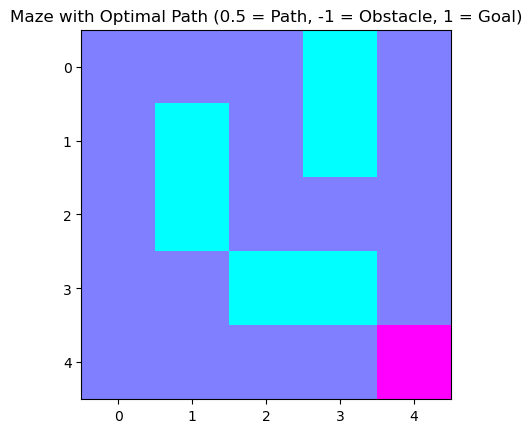

In [225]:
# Step 7: Visualize Path
path_maze = maze.copy()
for r, c in path:
    if path_maze[r, c] == 0:
        path_maze[r, c] = 0.5  # Mark path

plt.imshow(path_maze, cmap='cool', interpolation='nearest')
plt.title("Maze with Optimal Path (0.5 = Path, -1 = Obstacle, 1 = Goal)")
plt.show()